# <center> <font color='darkblue'>Digital Transformation: Trabajo Final </font> 
    

## 1.Introducción

El presente proyecto constituye un análisis estadístico de los datos correspondientes a la Liga Española (Liga BBVA), en su temporada 218-2019, obtenidos desde el sitio [_Football Data_](https://bit.ly/38aUQJZ)

En primera instancia llevaremos a cabo la extracción, limpieza y edición de los datos obtenidos, para luego dar lugar a la presentación de información en forma gráfica.

El objetivo fundamental de nuestro trabajo es poner en práctica los conocimientos asimilados durante el curso de _Digital Transformation_ a cargo de la docente Luz Frias, en el marco del Máster en Big Data y Analytics de la EAE Business School, edición 2019-2020.



## 2. Importación de Librerías y Datos

In [2]:
# Importamos las librearias requeridas
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import pandas as pd

# Leemos nuestro Dataset
Liga18_19 = pd.read_csv ("season1819.csv", encoding = "iso-8859-1", sep = ";")


### 2.1 Vista de nuestro dataset original

In [3]:
Liga18_19.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,SP1,17/08/2018,Betis,Levante,0,3,A,0,1,A,...,2.06,20,#¡CAMPO!,1.89,1.85,2.07,2.00,1.59,4.42,5.89
1,SP1,17/08/2018,Girona,Valladolid,0,0,D,0,0,D,...,1.71,20,#¡CAMPO!,2.06,2.01,1.90,1.85,1.76,3.57,5.62
2,SP1,18/08/2018,Barcelona,Alaves,3,0,H,0,0,D,...,3.18,19,#¡CAMPO!,1.95,1.91,2.00,1.95,1.10,11.85,32.17
3,SP1,18/08/2018,Celta,Espanol,1,1,D,0,1,A,...,1.76,18,#¡CAMPO!,2.26,2.18,1.74,1.71,2.18,3.26,3.85
4,SP1,18/08/2018,Villarreal,Sociedad,1,2,A,1,1,D,...,1.81,18,#¡CAMPO!,1.76,1.74,2.23,2.14,2.32,3.21,3.53


## 3. Limpieza de Datos 

### 3.1 Limpieza de columnas

Analizando nuestro dataset, notamos que existen numerosas columnas con datos relacionados con apuestas que no resultan de interés para nuestro estudio. Por lo tanto, procederemos a tomar las siguientes acciones:

1. Cambiar nombres de columnas por números (para facilitar la referencia de cada una)
2. Eliminar las columnas que no resultan de utilidad.
3. Renombrar las columnas de nuestro nuevo dataset.


#### 3.1.1 Cambiamos nombres originales por números, para tener una referencia más clara al eliminar.

In [4]:
Liga18_19.columns = ['0', '1', '2', '3', '4', '5', '6','7','8','9','10','11', '12','13','14','15','16','17','18', '19','20','21',
              '22','23','24', '25','26','27','28','29','30','31','32','33','34','35','36','37','38', '39', '40', '41','42',
              '43','44','45','46','47','48','49','50','51','52','53','54','55','56','57','58','59','60']


#### 3.1.2 Eliminamos las columnas que no son enriquecedoras para el análisis.

In [5]:
Liga18_19= Liga18_19.drop(['22','23','24', '25','26','27','28','29','30','31','32','33','34','35','36','37','38', '39', '40', '41','42','43','44',
         '45','46','47','48','49','50','51','52','53','54','55','56','57','58','59','60'], axis=1)


In [6]:
Liga18_19.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,SP1,17/08/2018,Betis,Levante,0,3,A,0,1,A,...,8,4,10,10,5,3,0,2,0,0
1,SP1,17/08/2018,Girona,Valladolid,0,0,D,0,0,D,...,1,1,21,20,3,2,1,1,0,0
2,SP1,18/08/2018,Barcelona,Alaves,3,0,H,0,0,D,...,9,0,6,13,7,1,0,2,0,0
3,SP1,18/08/2018,Celta,Espanol,1,1,D,0,1,A,...,2,5,13,14,8,7,3,2,0,0
4,SP1,18/08/2018,Villarreal,Sociedad,1,2,A,1,1,D,...,7,4,16,10,4,6,2,3,0,0


Comprobamos que efectivamente hemos eliminado las columnas deseadas:

In [7]:
Liga18_19.shape

(380, 22)

#### 3.1.3 Renombramos las columnas.

In [8]:
Liga18_19.columns = ['Liga', 'Fecha', 'Local', 'Visitante', 'GLT', 'GVT', 'RTDOF','GLM','GVM','RTDOM','Disparos_Local', 
               'Disparos_Visitante', 'Disparos_Local_Fuera','Disparos_Visitante_Fuera','Faltas_Local','Faltas_Visitante',
               'Corner_Local','Corner_Visitante','TAL', 'TAV','TRL','TRV']


#### 3.1.4 Presentamos un glosario para las columnas.

Nombre columna | Traducción
-- | --
GLT | Goles Local en Total
GVT | Goles Visitante en Total
RTDOF | Resultado Final
GLM | Goles Local en el Medio tiempo
GVM | Goles Visitante en el Medio tiempo
RTDOM | Resultado Medio tiempo
TAL | Tarjetas Amarillas Local
TAV | Tarjetas Amarillas Visitante
TRL | Tarjetas Rojas Local
TRV | Tarjetas Rojas Visitante

### 3.2 Definición tipos de datos

#### 3.2.1 Revisión de nuestros tipos de datos

Con ```dtypes``` observamos los tipos de datos que tenemos:

In [9]:
Liga18_19.dtypes

Liga                        object
Fecha                       object
Local                       object
Visitante                   object
GLT                          int64
GVT                          int64
RTDOF                       object
GLM                          int64
GVM                          int64
RTDOM                       object
Disparos_Local               int64
Disparos_Visitante           int64
Disparos_Local_Fuera         int64
Disparos_Visitante_Fuera     int64
Faltas_Local                 int64
Faltas_Visitante             int64
Corner_Local                 int64
Corner_Visitante             int64
TAL                          int64
TAV                          int64
TRL                          int64
TRV                          int64
dtype: object

Observamos, gracias a ```dtypes```, que los valores de nuestros datos son correctos, a excepción de Fecha. A continuación, cambiaremos su formato de object a datetime:

#### 3.2.2 Modificación de la Fecha

In [10]:
from datetime import date, datetime
import re
Liga18_19_Limpia = Liga18_19.copy()
Liga18_19_Limpia ["Fecha"] = Liga18_19_Limpia.Fecha.apply(lambda d : datetime.strptime(d,'%d/%m/%Y'))
Liga18_19_Limpia.dtypes

Liga                                object
Fecha                       datetime64[ns]
Local                               object
Visitante                           object
GLT                                  int64
GVT                                  int64
RTDOF                               object
GLM                                  int64
GVM                                  int64
RTDOM                               object
Disparos_Local                       int64
Disparos_Visitante                   int64
Disparos_Local_Fuera                 int64
Disparos_Visitante_Fuera             int64
Faltas_Local                         int64
Faltas_Visitante                     int64
Corner_Local                         int64
Corner_Visitante                     int64
TAL                                  int64
TAV                                  int64
TRL                                  int64
TRV                                  int64
dtype: object

## 4. Agrupación de Datos

En este punto contamos con un dataset que puede considerarse como "limpio", dado que carece de errores o datos incorrectos. Sobre la base de este conjunto de datos, crearemos otros subconjuntos que nos permitan manejar información a nivel de equipos, para así construir gráficos específicos.

#### 4.1 Equipos Local
Comenzamos obteniendo todos los datos de los equipos jugando como locatarios.

In [11]:
Equipos_Local = Liga18_19_Limpia.drop(['Visitante'], axis=1)
Equipos_Local = Equipos_Local.copy()
Equipos_Local['Equipo'] = Equipos_Local.Local
Equipos_Local['Disparos_Realizados_Puerta'] = Equipos_Local.Disparos_Local - Equipos_Local.Disparos_Local_Fuera
Equipos_Local['Disparos_Recibidos_Puerta'] = Equipos_Local.Disparos_Visitante - Equipos_Local.Disparos_Visitante_Fuera
Equipos_Local = Equipos_Local.groupby('Equipo',as_index=False).sum()
Equipos_Local.head()

,Equipo,GLT,GVT,GLM,GVM,Disparos_Local,Disparos_Visitante,Disparos_Local_Fuera,Disparos_Visitante_Fuera,Faltas_Local,Faltas_Visitante,Corner_Local,Corner_Visitante,TAL,TAV,TRL,TRV,Disparos_Realizados_Puerta,Disparos_Recibidos_Puerta
0,Alaves,19,19,9,8,247,223,71,74,276,268,89,99,50,47,0,0,176,149
1,Ath Bilbao,26,19,14,5,239,181,84,58,287,266,101,62,63,59,2,2,155,123
2,Ath Madrid,32,10,12,4,237,189,86,54,232,252,108,81,52,50,1,3,151,135
3,Barcelona,51,17,18,9,334,189,149,53,212,265,115,56,33,46,2,1,185,136
4,Betis,25,26,7,15,258,186,89,76,228,268,102,87,47,61,0,4,169,110


#### 4.2 Equipos Visitante

Continuando, extraemos todos los datos de los equipos en su condición de Visitantes.

In [12]:
Equipos_Visitante = Liga18_19_Limpia.drop(['Local'], axis=1)
Equipos_Visitante = Equipos_Visitante.copy()
Equipos_Visitante['Equipo'] = Equipos_Visitante.Visitante
Equipos_Visitante['Disparos_Realizados_Puerta'] = Equipos_Visitante.Disparos_Visitante - Equipos_Visitante.Disparos_Visitante_Fuera
Equipos_Visitante['Disparos_Recibidos_Puerta'] = Equipos_Visitante.Disparos_Local - Equipos_Visitante.Disparos_Local_Fuera
Equipos_Visitante = Equipos_Visitante.groupby('Equipo',as_index=False).sum()
Equipos_Visitante.head()

,Equipo,GLT,GVT,GLM,GVM,Disparos_Local,Disparos_Visitante,Disparos_Local_Fuera,Disparos_Visitante_Fuera,Faltas_Local,Faltas_Visitante,Corner_Local,Corner_Visitante,TAL,TAV,TRL,TRV,Disparos_Realizados_Puerta,Disparos_Recibidos_Puerta
0,Alaves,31,20,15,9,278,185,97,52,257,272,133,56,47,51,2,1,133,181
1,Ath Bilbao,26,15,10,9,214,148,61,55,256,294,77,52,47,57,0,3,93,153
2,Ath Madrid,19,23,5,10,245,205,83,74,225,244,91,109,45,51,1,4,131,162
3,Barcelona,19,39,9,19,220,227,80,105,301,195,102,91,56,44,4,0,122,140
4,Betis,26,19,10,4,238,186,80,80,315,208,101,84,62,42,3,1,106,158


#### 4.3 Unión de tablas - Creación de un Dataset Global

Habiendo extraído toda la información de los equipos, procedemos a unificar los datos en una única tabla (haciendo un  ```merge```)

In [13]:
Equipos = Equipos_Local.merge(Equipos_Visitante, on='Equipo')
Equipos.head()

,Equipo,GLT_x,GVT_x,GLM_x,GVM_x,Disparos_Local_x,Disparos_Visitante_x,Disparos_Local_Fuera_x,Disparos_Visitante_Fuera_x,Faltas_Local_x,...,Faltas_Local_y,Faltas_Visitante_y,Corner_Local_y,Corner_Visitante_y,TAL_y,TAV_y,TRL_y,TRV_y,Disparos_Realizados_Puerta_y,Disparos_Recibidos_Puerta_y
0,Alaves,19,19,9,8,247,223,71,74,276,...,257,272,133,56,47,51,2,1,133,181
1,Ath Bilbao,26,19,14,5,239,181,84,58,287,...,256,294,77,52,47,57,0,3,93,153
2,Ath Madrid,32,10,12,4,237,189,86,54,232,...,225,244,91,109,45,51,1,4,131,162
3,Barcelona,51,17,18,9,334,189,149,53,212,...,301,195,102,91,56,44,4,0,122,140
4,Betis,25,26,7,15,258,186,89,76,228,...,315,208,101,84,62,42,3,1,106,158


#### 4.3.1 Revisión de nuevas Columnas

A continuación, gracias a ```columns```, podemos observar cuáles son nuestras nuevas columnas, ya que _x corresponde a los equipos cuando juegan como local y _y cuando juegan como visitante:

In [14]:
Equipos.columns

Index(['Equipo', 'GLT_x', 'GVT_x', 'GLM_x', 'GVM_x', 'Disparos_Local_x',
       'Disparos_Visitante_x', 'Disparos_Local_Fuera_x',
       'Disparos_Visitante_Fuera_x', 'Faltas_Local_x', 'Faltas_Visitante_x',
       'Corner_Local_x', 'Corner_Visitante_x', 'TAL_x', 'TAV_x', 'TRL_x',
       'TRV_x', 'Disparos_Realizados_Puerta_x', 'Disparos_Recibidos_Puerta_x',
       'GLT_y', 'GVT_y', 'GLM_y', 'GVM_y', 'Disparos_Local_y',
       'Disparos_Visitante_y', 'Disparos_Local_Fuera_y',
       'Disparos_Visitante_Fuera_y', 'Faltas_Local_y', 'Faltas_Visitante_y',
       'Corner_Local_y', 'Corner_Visitante_y', 'TAL_y', 'TAV_y', 'TRL_y',
       'TRV_y', 'Disparos_Realizados_Puerta_y', 'Disparos_Recibidos_Puerta_y'],
      dtype='object')

#### 4.3.2 Creación de una tabla global

Vamos a crear una nueva tabla que contenga nuevas columnas a partir de la suma o resta de las columnas que ya teníamos, de forma que vamos a crear nuevos valores que hemos creído convenientes para llevar a cabo nuestro análisis.

In [15]:
# Creamos una Copia del Dataset anterior
Equipos_Global = Equipos.copy()

# Creamos columnas nuevas calculadas y con nombres adecuados.
Equipos_Global['GF'] = Equipos.GLT_x + Equipos.GVT_y
Equipos_Global['GC'] = Equipos.GVT_x + Equipos.GLT_y
Equipos_Global['DIFT'] = Equipos_Global.GF - Equipos_Global.GC
Equipos_Global['GFM'] = Equipos.GLM_x + Equipos.GVM_y
Equipos_Global['GCM'] = Equipos.GVM_x + Equipos.GLM_y
Equipos_Global['DIFM'] = Equipos_Global.GFM- Equipos_Global.GCM
Equipos_Global['Disparos_Realizados'] = Equipos.Disparos_Local_x + Equipos.Disparos_Visitante_y
Equipos_Global['Disparos_Recibidos'] = Equipos.Disparos_Visitante_x + Equipos.Disparos_Local_y
Equipos_Global['Disparos_Realizados_Puerta'] = Equipos_Global.Disparos_Realizados - (Equipos.Disparos_Local_Fuera_x + 
                                                                                     Equipos.Disparos_Visitante_Fuera_y)
Equipos_Global['Disparos_Recibidos_Puerta'] = Equipos_Global.Disparos_Recibidos - (Equipos.Disparos_Visitante_Fuera_x + 
                                                                                     Equipos.Disparos_Local_Fuera_y)
Equipos_Global['Disparos_Realizados_Fuera'] = Equipos.Disparos_Local_Fuera_x + Equipos.Disparos_Visitante_Fuera_y
Equipos_Global['Disparos_Recibidos_Fuera'] = Equipos.Disparos_Visitante_Fuera_x + Equipos.Disparos_Local_Fuera_y
Equipos_Global['Faltas_Realizadas'] = Equipos.Faltas_Local_x + Equipos.Faltas_Visitante_y
Equipos_Global['Faltas_Recibidas'] = Equipos.Faltas_Visitante_x + Equipos.Faltas_Local_y
Equipos_Global['Corner_Favor'] = Equipos.Corner_Local_x + Equipos.Corner_Visitante_y
Equipos_Global['Corner_Contra'] = Equipos.Corner_Visitante_x + Equipos.Corner_Local_y
Equipos_Global['TA_Recibidas'] = Equipos.TAL_x + Equipos.TAV_y
Equipos_Global['TA_Forzadas'] = Equipos.TAV_x + Equipos.TAL_y
Equipos_Global['TR_Recibidas'] = Equipos.TRL_x + Equipos.TRV_y
Equipos_Global['TR_Forzadas'] = Equipos.TRV_x + Equipos.TRL_y
Equipos_Global2 = Equipos_Global.drop(['GLT_x', 'GVT_x', 'GLM_x', 'GVM_x', 'Disparos_Local_x', 'Disparos_Visitante_x',
                                       'Disparos_Local_Fuera_x', 'Disparos_Visitante_Fuera_x', 'Faltas_Local_x',
                                       'Faltas_Visitante_x','Corner_Local_x', 'Corner_Visitante_x', 'TAL_x', 'TAV_x', 
                                       'TRL_x', 'TRV_x', 'GLT_y', 'GVT_y', 'GLM_y', 'GVM_y', 'Disparos_Local_y',
                                       'Disparos_Visitante_y','Disparos_Local_Fuera_y','Disparos_Visitante_Fuera_y', 
                                       'Faltas_Local_y', 'Faltas_Visitante_y', 'Corner_Local_y', 'Corner_Visitante_y',
                                       'TAL_y','TAV_y', 'TRL_y', 'TRV_y', 'Disparos_Realizados_Puerta_x',
                                      'Disparos_Recibidos_Puerta_x', 'Disparos_Realizados_Puerta_y',
                                      'Disparos_Recibidos_Puerta_y'], axis = 1)

# Agregamos una columna con las provincias correspondientes a cada equipo, para tener una referencia geográfica
Equipos_Global2['Localizacion']=['Pais Vasco', 'Pais Vasco', 'Comunidad de Madrid', 'Cataluña', 'Andalucia','Galicia', 
                                'Pais Vasco', 'Cataluña', 'Comunidad de Madrid', 'Cataluña', 'Aragon', 'Comunidad de Madird',
                                'Valencia', 'Comunidad de Madrid','Andalucia','Comunidad de Madrid', 'Valencia', 'Castilla y Leon',
                                'Comunidad de Madrid', 'Valencia']
Equipos_Global2.head()

,Equipo,GF,GC,DIFT,GFM,GCM,DIFM,Disparos_Realizados,Disparos_Recibidos,Disparos_Realizados_Puerta,...,Disparos_Recibidos_Fuera,Faltas_Realizadas,Faltas_Recibidas,Corner_Favor,Corner_Contra,TA_Recibidas,TA_Forzadas,TR_Recibidas,TR_Forzadas,Localizacion
0,Alaves,39,50,-11,18,23,-5,432,501,309,...,171,548,525,145,232,101,94,1,2,Pais Vasco
1,Ath Bilbao,41,45,-4,23,15,8,387,395,248,...,119,581,522,153,139,120,106,5,2,Pais Vasco
2,Ath Madrid,55,29,26,22,9,13,442,434,282,...,137,476,477,217,172,103,95,5,4,Comunidad de Madrid
3,Barcelona,90,36,54,37,18,19,561,409,307,...,133,407,566,206,158,77,102,2,5,Cataluña
4,Betis,44,52,-8,11,25,-14,444,424,275,...,156,436,583,186,188,89,123,1,7,Andalucia


In [16]:
## Analizamos el tamaño de nuestro nuevo conjunto de datos
Equipos_Global2.shape

(20, 22)

#### 4.3.3 Tabla de referencia de nuestro nuevo Dataset

Nombre columna | Traducción
-- | --
GF | Goles a Favor
GC | Goles en Contra
DIFT | Diferencia Total goles 
GFM | Goles a Favor en el Medio tiempo
GCM | Goles en Contra en el Medio tiempo
DIFM | Diferencia Total goles en el Medio tiempo
TA_Recibidas | Tarjetas Amarillas Recibidas
TA_Forzadas | Tarjetas Amarillas Forzadas
TR_Recidas | Tarjetas Rojas Recibidas
TR_Forzadas | Tarjetas Rojas Forzadas

## 5. Análisis Gráfico

En el presente apartado analizamos los datos obtenidos de nuestro dataset y creamos gráficos para poder sacar conclusiones.

In [17]:
## Determinamos las dimensiones generales de nuestros gráficos (en algunos casos son modificadas)
from matplotlib import rcParams
rcParams['figure.figsize'] = 10, 6
sns.set_context('talk')

#### 5.1  ¿Cuál equipo es el más goleador y de qué provincia proviene?

A continuación, vamos a situar los equipos según sus comunidades autónomas para localizar dónde se encuentra el mayor y el menor goleador.

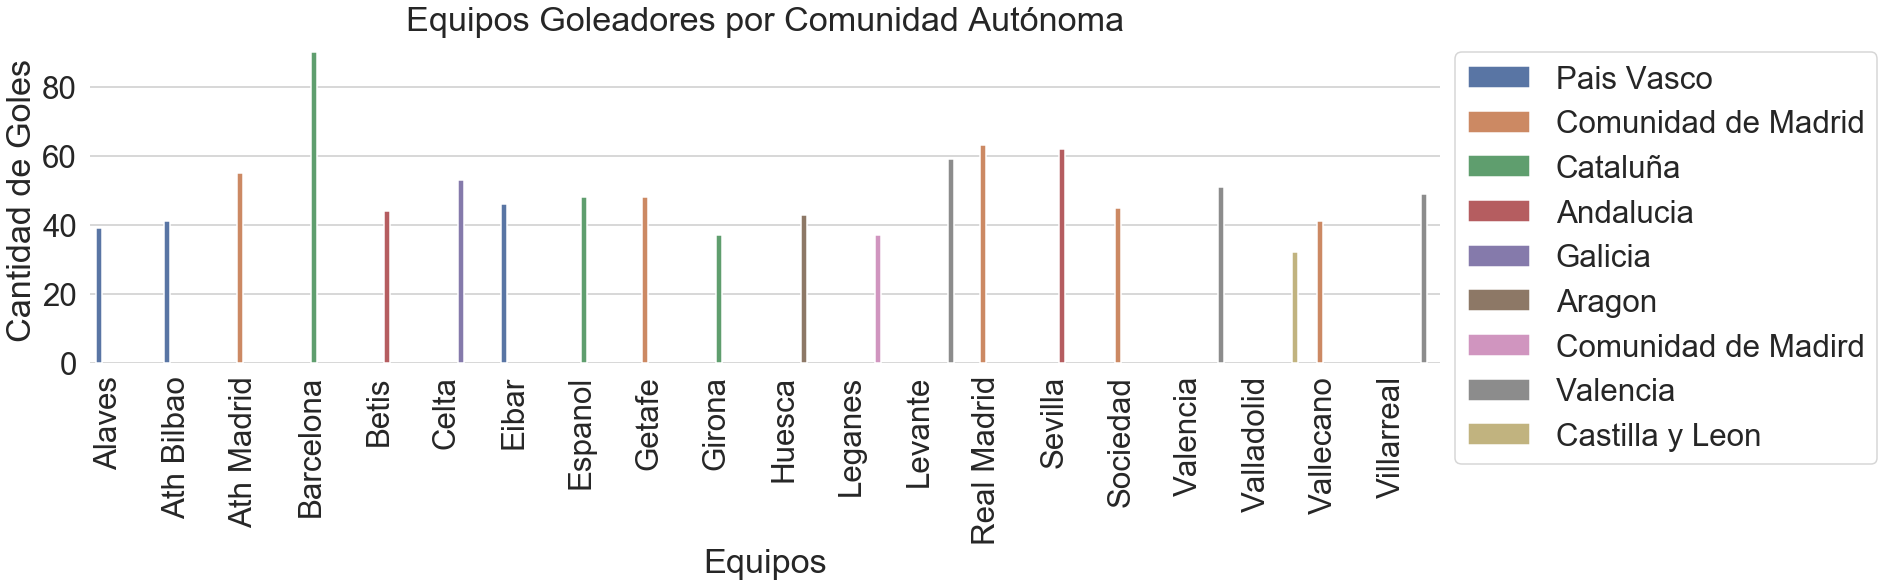

In [18]:
sns.set(style="whitegrid")
sns.despine(left=True, bottom=True)
sns.set_context("talk", font_scale= 1.9)
out = sns.barplot(x='Equipo', y='GF', data=Equipos_Global2, hue='Localizacion')
out.set_xticklabels(Equipos_Global2.Equipo, rotation=90, horizontalalignment='right')
plt.legend(bbox_to_anchor=(1,1), ncol=1)
plt.title('Equipos Goleadores por Comunidad Autónoma')
plt.ylabel("Cantidad de Goles")
plt.xlabel("Equipos")
sns.despine(left=True, bottom=True)
plt.subplots_adjust(right=2)
plt.show()


Sin duda, el Barcelona es el goleador por excelencia seguido muy por detrás del Real Madrid y muy a la par de este el Sevilla. Destaca como peor goleador el Valladolid.

#### 5.2 ¿Cuál es la relación entre goles en contra y goles a favor por equipo?

Para dar una respuesta gráfica a esta pregunta, habremos de crear una tabla especial que nos permita trabajar con ```seaborn```. En este caso, crearemos una tabla en formato largo, que contenga, únicamente, Equipos, Goles a Favor y Goles en Contra.

In [19]:
# Creación del dataset específico que queremos utilizar
GolesFC = Equipos_Global2.copy()
GolesFC = GolesFC [["Equipo", "GF","GC"]]
GolesFC.columns = ['Equipo', 'Goles a Favor', "Goles en Contra"]

# Tranformación a formato largo
GolesFC_Long = GolesFC.melt(id_vars=["Equipo"])

GolesFC_Long.head()

,Equipo,variable,value
0,Alaves,Goles a Favor,39
1,Ath Bilbao,Goles a Favor,41
2,Ath Madrid,Goles a Favor,55
3,Barcelona,Goles a Favor,90
4,Betis,Goles a Favor,44


Como podemos apreciar, nuestro conjunto específico de datos cuenta con un formato largo, 
compatible con las funciones de gráficas de ```seaborn```

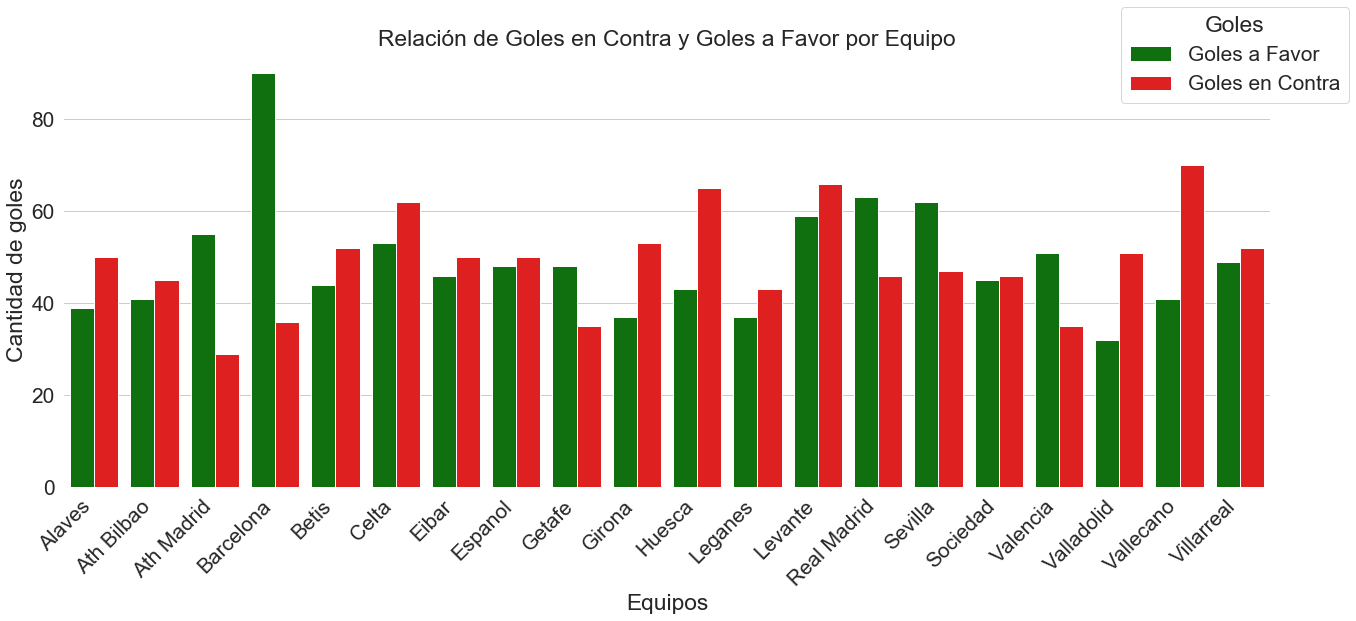

In [20]:
## Creamos el gráfico
#sns.set_color_codes("pastel")
sns.set(style="whitegrid") # Selecciono un estilo de seaborn para la gráfica.

sns.set_context("notebook", font_scale= 1.9) # Determino el contexto, para marcar también tamaño del gráfico.
f, ax = plt.subplots(figsize=(10, 8)) # Defino variables de subplots, para poder modificar detalles del gráfico
pal = ['green', 'Red']
# Genero el gráfico y lo guardo en una variable.
out = sns.barplot(x = "Equipo", y="value", hue = "variable", data=GolesFC_Long, palette = pal )
# Igualo la subgráfica f a la gráfica, para poder modificar dimensiones y otros detalles.
f = out
# Título del Gráfico
plt.title('Relación de Goles en Contra y Goles a Favor por Equipo')
# Determino las etiquetas del eje de la x
out = out.set_xticklabels(GolesFC_Long.Equipo, rotation=45, horizontalalignment='right')
plt.xlabel('Equipos')
# Determino etiqueta del eje de la y
plt.ylabel('Cantidad de goles')
# Leyenda
labels=["Goles a Favor","Goles en Contra"]
f.legend(loc="upper right", borderaxespad=2, title="Goles", bbox_to_anchor=(1.1 ,1.2))
# Determino el ajuste de la gráfica (más a lo largo o más a lo ancho)
plt.subplots_adjust(right=1.8)
# Quito los ejes de la gráfica.
sns.despine(left=True, bottom=True)

plt.show()


En líneas generales, notamos que la mayoría de los equipos han mantenido una relación bastante equilibrada entre la cantidad e goles hechos y la cantidad de goles recibidos con algunas excepciones, como es el caso del FC Barcelona, en el que los goles a favor representan más del doble de los goles en contra. En una línea similar, vemos que el Atlético de Madrid también logró una muy buena relación entre goles convertidos y recibidos. Por último, notamos que equipos como Valladolid, Huesca y Valencia, se colocan en las antípodas del FC Barcelona y el Atlético de Madrid, habiendo recibido muchos más goles de los convertidos.

#### 5.3 ¿Es cierto el mito del fútbol?

El mito explica que todo equipo de local siempre es favorito para ganar, hecho que a veces se cumple y a veces no. A continuación, analizamos la veracidad del mito, analizando la distribución de resultados de los partidos jugados como local por todos los equipos.

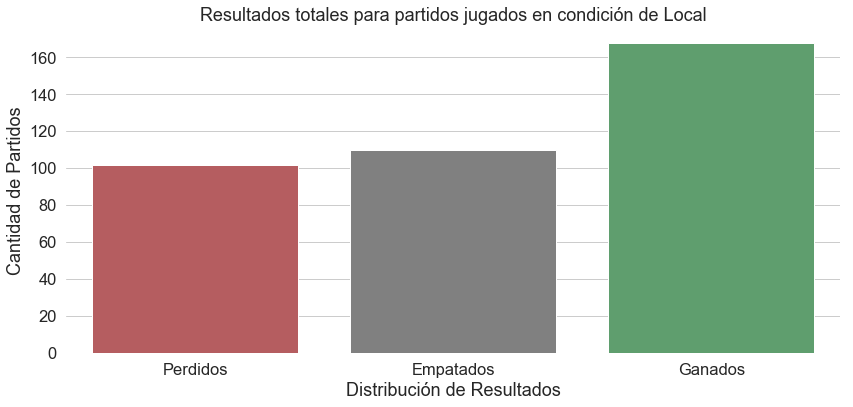

In [21]:
# GRAFICO:

# Creomos una paleta de colores para el gráfico.
clrs = ['r', 'gray',"g"]
# Creomos el gráfico.
sns.set_context("notebook", font_scale= 1.5)
out = sns.countplot(x='RTDOF', data = Liga18_19_Limpia, palette= clrs)
# Establecemos etiqueta del eje de la x
plt.xlabel('Distribución de Resultados')
# Establecemos etiqueta del eje de la y
plt.ylabel('Cantidad de Partidos')

# Ponemos un título al gráfico
plt.title('Resultados totales para partidos jugados en condición de Local')
# Nombramos las barras del gráfico por separado
registro = [0,1,2]
resultados = ["Perdidos", "Empatados", "Ganados"]
plt.xticks(registro, resultados)

plt.subplots_adjust(right=1.2)
# Quitamos los ejes de la gráfica.
sns.despine(left=True, bottom=True)

plt.show()


Con esta gráfica se corrobora el mito del futbol, el cual dice que los equipos juagan mejor en casa, en su propio campo. Podemos observar, con gran diferencia, como la mayoría de los partidos ganados los gana el equipo local. La diferencia entre partidos empatados y cuando gana el equipo visitante están muy a la par.

Podemos observar lo anterior numéricamente:

In [22]:
Resultado = Liga18_19_Limpia.drop(['Visitante'], axis=1)
Resultado = Resultado.copy()
Resultado['Equipo'] = Resultado.Local
Resultado = Resultado.groupby('RTDOF',as_index=False).size()
Resultado

RTDOF
A    102
D    110
H    168
dtype: int64

#### 5.3.1 ¿Cuántos partido ganó, perdió y empató cada equipo durante la temporada?

En esta sección, nos proponemos obtener la cantidad de Partidos Ganados, Perdidos y Empatados por equipo.
Los únicos datos relativos a resultados se encuentran en nuestra tabla ```Liga18_19_Limpia``` a nivel de fechas, mientras que nuestra información agrupada por equipos se encuentra en el conjunto de datos llamado ```Equipos_Global2```. Por tanto, para cumplir con nuestro objetivo, seguiremos los siguientes pasos:
1. Crearemos la tabla```Partidos``` con todos los equipos, a partir de la tabla ```Equipos_Global2```
2. A ```Partidos``` le crearemos 3 columnas: "Ganados", "Perdidos" y "Empatados"
3. Crearemos una tabla llamada ```L_V_R ```(Local, Visitante, Resultado), a partir de la tabla ```Liga18_19_Limpia```
4. Para cada equipo en la tabla ```Partidos``` analizaremos su condición (local o visitante) y su resultado correspondiente en la tabla ```L_V_R ```, para así completar las columnas "Ganados", "Perdidos" y "Empatados".


In [23]:
# Puntos 1 y 2
partidos = Equipos_Global2.copy()
partidos = partidos[["Equipo"]]
partidos["Ganados"] = 0
partidos["Perdidos"] = 0
partidos["Empatados"] = 0
partidos.head()

,Equipo,Ganados,Perdidos,Empatados
0,Alaves,0,0,0
1,Ath Bilbao,0,0,0
2,Ath Madrid,0,0,0
3,Barcelona,0,0,0
4,Betis,0,0,0


In [24]:
# Punto 3
L_V_R = Liga18_19_Limpia.copy()
L_V_R = L_V_R[["Local", "Visitante", "RTDOF"]]
L_V_R.head()

,Local,Visitante,RTDOF
0,Betis,Levante,A
1,Girona,Valladolid,D
2,Barcelona,Alaves,H
3,Celta,Espanol,D
4,Villarreal,Sociedad,A


In [25]:
# Punto 4 - Calculamos partidos Ganados, Perdidos y Empatados
## Ocultamos las advertencias
import warnings
warnings.filterwarnings("ignore")
# Recorro el dataset de partidos (voy equipo por equipo)
# Para cada equipo, recorro todos los registros del dataset L_V_R
# Voy sumando partidos Ganados, Perdidos y Empatados, dependiendo de si jugó como Visitante o como Local
for i in range(0,len(partidos)):
    gana = 0
    pierde = 0
    empata = 0
    for j in range(0,len(L_V_R )):
        ## Cuando gana
        if L_V_R .Local[j] == partidos.Equipo[i] and L_V_R .RTDOF[j] == 'H'or L_V_R .Visitante[j] == partidos.Equipo[i] and L_V_R .RTDOF[j] == 'A':
            gana += 1
        
        # Cuando Pierde
        elif L_V_R .Local[j] == partidos.Equipo[i] and L_V_R .RTDOF[j] == 'A' or L_V_R .Visitante[j] == partidos.Equipo[i] and L_V_R .RTDOF[j] == 'H':
            pierde += 1
                        
        # Cuando Empata
        elif L_V_R .Local[j] == partidos.Equipo[i] and L_V_R .RTDOF[j] == 'D' or L_V_R .Visitante[j] == partidos.Equipo[i] and L_V_R .RTDOF[j] == 'D':
            empata += 1
    partidos.iloc[i,1] = gana
    partidos.iloc[i,2] = pierde
    partidos.iloc[i,3] = empata

partidos.head()                    

,Equipo,Ganados,Perdidos,Empatados
0,Alaves,13,14,11
1,Ath Bilbao,13,11,14
2,Ath Madrid,22,6,10
3,Barcelona,26,3,9
4,Betis,14,16,8


In [26]:
## Creo una versión Larga de Partidos para poder graficar
partidos_Long = partidos.melt(id_vars=["Equipo"])
partidos_Long.head()


,Equipo,variable,value
0,Alaves,Ganados,13
1,Ath Bilbao,Ganados,13
2,Ath Madrid,Ganados,22
3,Barcelona,Ganados,26
4,Betis,Ganados,14


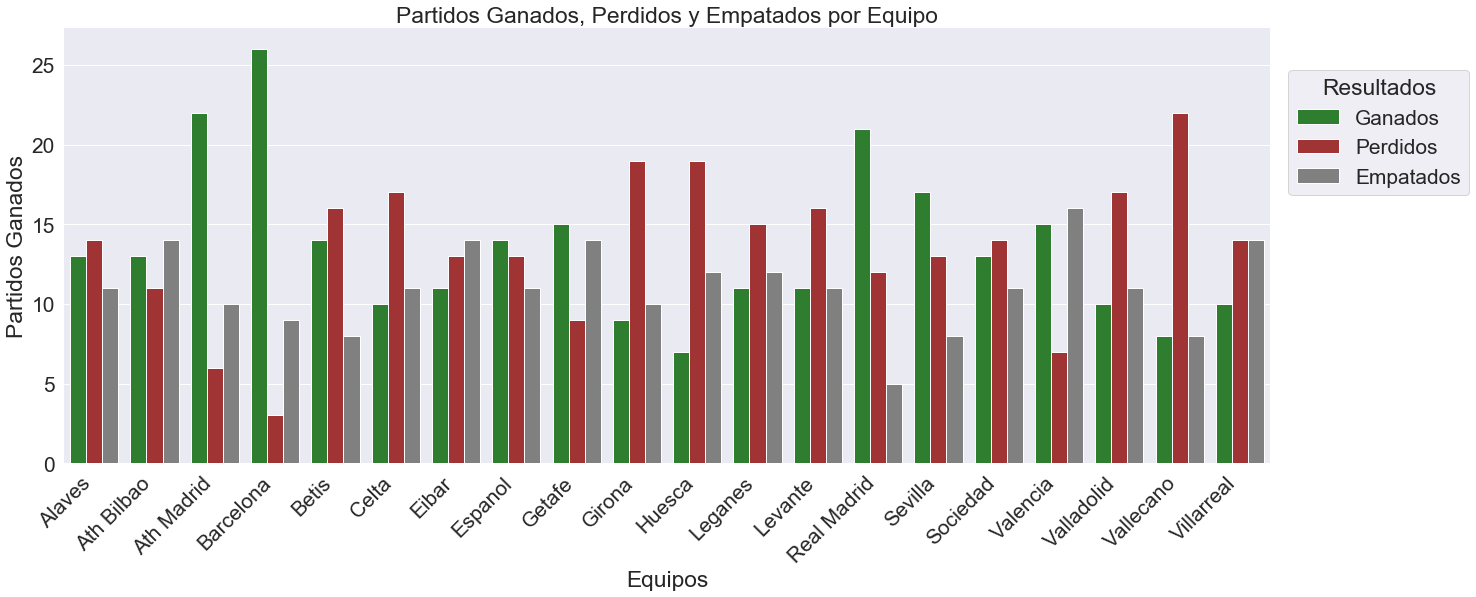

In [27]:
## GRÁFICO: PARTIDOS GANADOS, PERDIDOS Y EMAPATADOS X EQUIPO
sns.set(style="darkgrid")
sns.set_context("notebook", font_scale= 1.9)
f, ax = plt.subplots(figsize=(10, 8))
pal = ['forestgreen', 'firebrick', "gray"]
out = sns.barplot(x = "Equipo", y="value", hue = "variable", palette = pal, data=partidos_Long )
f = out
plt.title('Partidos Ganados, Perdidos y Empatados por Equipo')
out = out.set_xticklabels(GolesFC_Long.Equipo, rotation=45, horizontalalignment='right')
plt.xlabel('Equipos')
plt.ylabel('Partidos Ganados')
f.legend(loc="upper right", borderaxespad=2, title="Resultados", bbox_to_anchor=(1.2 ,1.0))
plt.subplots_adjust(right=1.8)
sns.despine(left=True, bottom=True)
plt.show()

La presente gráfica deja en claro que el **Barcelona Football** Club ha sido el campeón de la Liga en su temporada 2018-2019, con 26 partidos ganados. Sin dudas una temporada para el recuerdo de los culé.

Por otra parte, notamos un paupérrimo desempeño del **Rayo Vallecano**, que perdió la gran mayoría de sus partidos durante toda la temporada.

#### 5.4 ¿Cuál es la relación entre faltas y tarjetas amarillas por equipo?

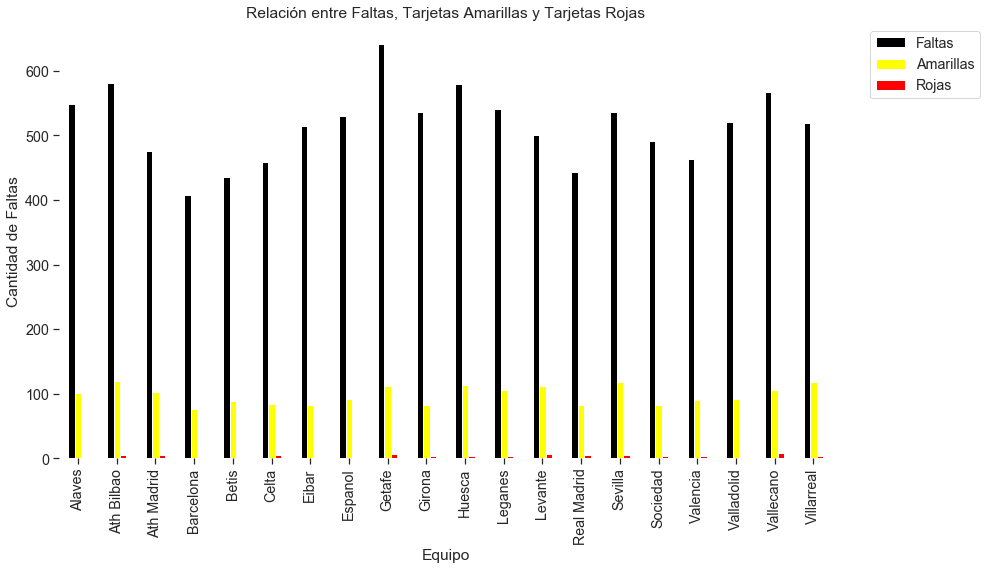

In [28]:
sns.set(style="ticks")
rcParams['figure.figsize'] = 10, 8 
sns.set_context("notebook", font_scale = 1.3)
Equipos_Global2.plot.bar(x = "Equipo", y=["Faltas_Realizadas","TA_Recibidas","TR_Recibidas"], 
                         color=("black", "yellow", "red"), 
                         label =["Faltas", "Amarillas", "Rojas"])
plt.title("Relación entre Faltas, Tarjetas Amarillas y Tarjetas Rojas")
plt.ylabel("Cantidad de Faltas")
plt.legend(bbox_to_anchor=(1.2, 1.0), ncol=1)
plt.subplots_adjust(right=1.2)
# Quito los ejes de la gráfica.
sns.despine(left=True, bottom=True)
plt.show()

Observando la relación entre las faltas, las tarjetas rojas y las amarillas, podríamos concluir que los jueces tienden a ser bastantes permisivos, o que las faltas, no obstante numerosas, carecen del grado de violencia requerido para justificar una amonestación de gravedad.
Por otra parte, el gráfico parece indicar que la temporada no estuvo caracterizada por las expulsiones en los encuentros, dada la desproporcionada relación entre las tarjetas rojas, las amarillas y las faltas.

#### 5.5 ¿En qué Comunidades Autónomas se encuentran los equipos que cometen más faltas?

In [29]:
comunidades_mas_faltas = Equipos_Global2[(Equipos_Global2.Localizacion == 'Valencia') | 
                                         (Equipos_Global2.Localizacion == 'Andalucia') | 
                                         (Equipos_Global2.Localizacion == 'Pais Vasco') | 
                                         (Equipos_Global2.Localizacion == 'Comunidad de Madrid') | 
                                         (Equipos_Global2.Localizacion == 'Cataluña') ] 


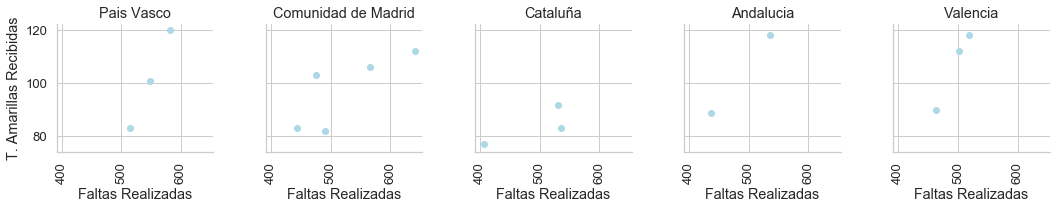

In [30]:
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale = 1.2)
g = sns.FacetGrid(comunidades_mas_faltas, col="Localizacion", sharey=True)
g.map(plt.scatter, "Faltas_Realizadas", "TA_Recibidas", color='lightblue').set_titles("{col_name}")
g.set_xticklabels(rotation=90)
axes = g.axes.flatten()
axes[0].set_ylabel("T. Amarillas Recibidas")
for ax in axes:
    ax.set_xlabel("Faltas Realizadas")

Con este análisis por facetas podemos comparar del mismo vistazo la relacion existente entre las faltas que comenten los equipos y las tarjetas amarillas que reciben por Comunidades Autónomas. Pudiendo sacar como conlcusión, que los equipos que juegan en el Pais Vasco y Andalucía son los que mayor faltas y tarjetas obtuvieron.

#### 5.6 ¿Cuál es la efectividad de los equipos?

Para poder analizar la efectividad de los equipos vamos a dividir los goles entre los disparos a puerta tanto cuando juegan como local, visitante y global:

##### 5.7 Efectividad de los equipos cuando juegan como equipo local

In [31]:
Efectividad = Equipos_Local[['Equipo', 'GLT', 'GVT', 'Disparos_Local', 'Disparos_Visitante', 
                             'Disparos_Realizados_Puerta', 'Disparos_Recibidos_Puerta']]
Efectividad_Local = Efectividad.copy()
Efectividad_Local['Efectividad_Favor'] = Efectividad_Local.GLT / Efectividad_Local.Disparos_Realizados_Puerta
Efectividad_Local['Efectividad_Contra'] = Efectividad_Local.GVT / Efectividad_Local.Disparos_Recibidos_Puerta
Efectividad_Local.head()

,Equipo,GLT,GVT,Disparos_Local,Disparos_Visitante,Disparos_Realizados_Puerta,Disparos_Recibidos_Puerta,Efectividad_Favor,Efectividad_Contra
0,Alaves,19,19,247,223,176,149,0.107955,0.127517
1,Ath Bilbao,26,19,239,181,155,123,0.167742,0.154472
2,Ath Madrid,32,10,237,189,151,135,0.211921,0.074074
3,Barcelona,51,17,334,189,185,136,0.275676,0.125000
4,Betis,25,26,258,186,169,110,0.147929,0.236364


##### 5.8 Efectividad de los equipos cuando juegan como equipo visitante

In [32]:
Efectividad2 = Equipos_Visitante[['Equipo', 'GLT', 'GVT', 'Disparos_Local', 'Disparos_Visitante', 
                             'Disparos_Realizados_Puerta', 'Disparos_Recibidos_Puerta']]
Efectividad_Visitante = Efectividad2.copy()
Efectividad_Visitante['Efectividad_Favor'] = Efectividad_Visitante.GVT / Efectividad_Visitante.Disparos_Realizados_Puerta
Efectividad_Visitante['Efectividad_Contra'] = Efectividad_Visitante.GLT / Efectividad_Visitante.Disparos_Recibidos_Puerta
Efectividad_Visitante.head()

,Equipo,GLT,GVT,Disparos_Local,Disparos_Visitante,Disparos_Realizados_Puerta,Disparos_Recibidos_Puerta,Efectividad_Favor,Efectividad_Contra
0,Alaves,31,20,278,185,133,181,0.150376,0.171271
1,Ath Bilbao,26,15,214,148,93,153,0.161290,0.169935
2,Ath Madrid,19,23,245,205,131,162,0.175573,0.117284
3,Barcelona,19,39,220,227,122,140,0.319672,0.135714
4,Betis,26,19,238,186,106,158,0.179245,0.164557


##### 5.9 Efectividad de los equipos de forma global (cuando juegan como visitante y como local)

In [33]:
Efectividad_Global = Efectividad_Local.merge(Efectividad_Visitante, on='Equipo')
Efectividad_Global = Efectividad_Global.drop(['GLT_x', 'GVT_x', 'Disparos_Local_x', 'Disparos_Visitante_x',
                                              'Disparos_Realizados_Puerta_x', 'Disparos_Recibidos_Puerta_x',
                                              'GLT_y', 'GVT_y', 'Disparos_Local_y', 'Disparos_Visitante_y',
                                             'Disparos_Realizados_Puerta_y', 'Disparos_Recibidos_Puerta_y'], axis=1)
Efectividad_Global.columns = ['Equipo', 'Efectividad_Equipo_Local', 'Efectividad_Todos_Visitante', 
                              'Efectividad_Equipo_Visitante', 'Efectividad_Todos_Local']
Efectividad_Global.head()

,Equipo,Efectividad_Equipo_Local,Efectividad_Todos_Visitante,Efectividad_Equipo_Visitante,Efectividad_Todos_Local
0,Alaves,0.107955,0.127517,0.150376,0.171271
1,Ath Bilbao,0.167742,0.154472,0.161290,0.169935
2,Ath Madrid,0.211921,0.074074,0.175573,0.117284
3,Barcelona,0.275676,0.125000,0.319672,0.135714
4,Betis,0.147929,0.236364,0.179245,0.164557


##### 5.10 Análisis gráfico de la efectividad de los equipos cuando juegan como equipo local y visitante

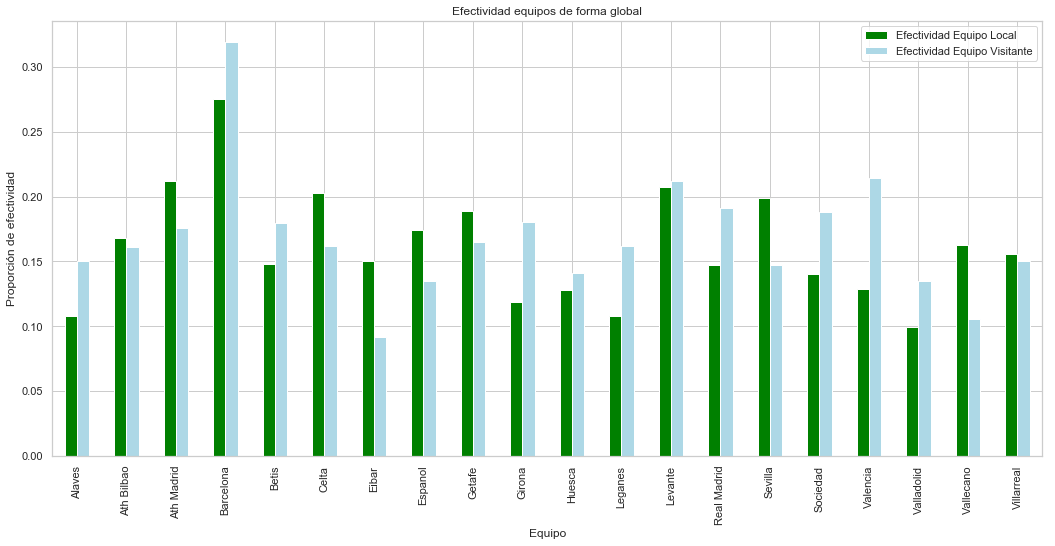

In [34]:
sns.set(style="whitegrid")
Efectividad_Global.plot(x = "Equipo", y=['Efectividad_Equipo_Local', 'Efectividad_Equipo_Visitante'], kind = "bar", 
                       color= ("green","lightblue"), label =["Efectividad Equipo Local", "Efectividad Equipo Visitante"])
plt.title("Efectividad equipos de forma global")
plt.ylabel("Proporción de efectividad")
plt.subplots_adjust(right=1.5)
plt.show()

Observando el gráfico podemos concluir que la mitad de los equipos de la liga española son más efectivos cuando juegan como equipo local, y la otra mitad lo son cuando juegan como equipo visitante. Lo que no es muy contrastable con el análisis anterior en el cual pudimos concluir que la mayoría de los equipos ganan cuando juegan como equipo local.

#### 5.11 ¿Dónde se localizan los estadios en España?

In [35]:
import folium
import pandas as pd
Estadios = pd.DataFrame({'Equipo':  ['Alaves', 'Ath Bilbao', 'Ath Madrid', 'Barcelona', 'Betis', 'Celta', 'Eibar',
                                    'Espanol', 'Getafe', 'Girona', 'Huesca','Leganes', 'Levante', 'Real Madrid', 
                                     'Sevilla', 'Sociedad', 'Valencia', 'Valladolid', 'Vallecano', 'Villareal'],
                         'Latitud': [42.846861, 43.264328, 40.436641, 41.380928, 37.356552, 42.211904, 43.181807, 
                                    41.348338, 40.325759, 41.961242, 42.131636, 40.340653, 39.494835, 40.453226, 
                                     37.384270, 43.301425, 39.474648, 41.644629, 40.392604, 39.943453],
                         'Longitud': [-2.689938, -2.949560, -3.599456, 2.122820, -5.981761, -8.739751, -2.475979, 
                                     2.074755, -3.714940, 2.828395, -0.425381, -3.760644, -0.363863, -3.688280, 
                                     -5.970658, -1.973693, -0.358253, -4.761243, -3.658744, -0.103917],
                        'Nombres': ['Mendizorrotza', 'Sam Mames', 'Wanda Metropolitano', 'Camp Nou', 'Benito Villamarin',
                                   'Balaidos', 'Ipurua', 'RCDE Stadium', 'Coliseum', 'Montilivi', 'El Alcoraz', 
                                   'Butarque', 'Ciutat de Valencia', 'Santiago Bernabeu', 'Ramon Sanchez Pijuan',
                                   'Municipal de Anoeta', 'Mestalla', 'Zorrilla', 'Vallecas', 'Ceramica']})
Estadios

,Equipo,Latitud,Longitud,Nombres
0,Alaves,42.846861,-2.689938,Mendizorrotza
1,Ath Bilbao,43.264328,-2.949560,Sam Mames
2,Ath Madrid,40.436641,-3.599456,Wanda Metropolitano
3,Barcelona,41.380928,2.122820,Camp Nou
4,Betis,37.356552,-5.981761,Benito Villamarin
5,Celta,42.211904,-8.739751,Balaidos
6,Eibar,43.181807,-2.475979,Ipurua
7,Espanol,41.348338,2.074755,RCDE Stadium
8,Getafe,40.325759,-3.714940,Coliseum
9,Girona,41.961242,2.828395,Montilivi


In [36]:
Mapa_Estadios = folium.Map(location=[40.42, -3.7], zoom_start=6)

colores = {'Alaves': 'blue',
           'Ath Bilbao': 'red',
           'Ath Madrid': 'red',
           'Barcelona': 'purple',
          'Betis': 'green',
          'Celta': 'blue',
          'Eibar': 'purple',
          'Espanol': 'blue',
          'Getafe': 'blue',
          'Girona': 'red',
          'Huesca': 'purple',
          'Leganes': 'blue',
          'Levante': 'purple',
          'Real Madrid': 'white',
          'Sevilla': 'red',
          'Sociedad': 'blue',
          'Valencia': 'orange',
          'Valladolid': 'purple',
          'Vallecano': 'white',
          'Villareal': 'yellow'}

Estadios.apply(
    lambda row: folium.CircleMarker([row.Latitud, row.Longitud], popup=row.Nombres, tooltip=row.Equipo, radius=5, 
                                   color = colores[row.Equipo]).add_to(Mapa_Estadios),
    axis=1
)
Mapa_Estadios

### Conclusiones Generales

Finalizado nuestro trabajo, podemos llevar a cabo las siguientes conclusiones:

1. El equipo ganador de la Liga BBVA, en su temporada 2018-2019 es el Barcelona FC, hecho que queda constatado, sin lugar a dudas, en base a sus partidos ganados y su saldo de Goles. Ha sido un campeonato casi perfecto para los catalanes. El Barcelona ha sido el mayor goleador y el que menos faltas y tarjetas ha recibido, más aún es el equipo cuya diferencia entre goles a favor y en contra es mayor de forma positiva.

2. El peor equipo ha sido el Rayo Vallecano, quedando en la última posición tras haber perdido la gran mayoría de sus partidos. Sin dudas, un desempeño para el olvido.

3. En cuanto a la relación de faltas y tarjetas, el campeonato ha estado marcado por un número significativo de faltas (más de 600), pero no así de tarjetas. Entendemos que los jueces han demostrado un alto grado de permisibilidad.

4. En cuanto a la eficiencia de los equipos, nos sorprendió descubrir que aproximadamente el 50% de los equipos son más eficientes (relación tiros/goles) como visitantes, tomando en cuenta que tienden a ganar más de locatarios.
